![](https://mk0digitallearn7ttjx.kinstacdn.com/wp-content/uploads/2018/12/ACADEMIC-EXCELLENCE.jpg)
# Introduction 
This week, we are going to perform another simple exploratory data analysis on student's performance dataset. Unlike any dataset you have seen, this dataset uses categorical variables. So our dependent variable, Y comprise of test scores while our X variables comrprise of categroical variables. The question to ask ourselves is: How do we test correlation for this? Have a quick think about this before attempting the exercises.

This dataset is obtained from this [website](http://roycekimmons.com/tools/generated_data/exams) and if we look under the disclaimer, we will see this statement: **"All data sets are fictional and should be used for educational purposes only."** Well, so before you make any further interpretation, do note that this data will work perfectly in an ideal world but in reality, we are far from achieving such results. Also, we have no idea what is the parameter set for this generator so if you are planning to work on your ML skills, do take the result as a grain of salt.

## Objective
- To identify correlation betweeen each variable and the test scores

## Importing packages 
- This time we will also include statsmodels for our correlation analysis.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Importing dataset into colab
# As we are working with colab, we will need to use the following code to import the dataset into this notebook
from google.colab import files 
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving StudentsPerformance.csv to StudentsPerformance.csv


## Create a function to generate an overview of the data 
- Here we will create a function to generate an overview of the data.
### Why function?
![alt text](https://media2.giphy.com/media/fCdozG4XPYrDO/source.gif)
- If you find yourself copying and pasting code please stop! 
- Functions are a programming concept that allows us to organize our code into sections. This organization makes code easier to read, but also allows the programmer to reuse code throughout a program. So please please utilise that!
- Another great habit to do in a function is docstring. Docstring allow you and other users to know what the function does and return. Imagine you have 50+ functions in your script, how do you actually know what it does without going back to read it? The only solution is docstring! An example of docstring:
```py
def name_printer(name):
    '''
    Args
    name(str): Name of student 

    Print name of student

    Returns:
    Nothing
    '''
    print(name)

  help(name_printer)
```
      Output: Help on function name_printer in module __main__:

              name_printer(name)
              Args
              name(str): Name of student 
    
              Print name of student
    
              Returns:
              Nothing

- If you are just starting to pick up python and still have issues with functions, do spend some time with learning it from online resources like [w3schools](https://www.w3schools.com/python/python_functions.asp). Do feel free to reach out to me if you need help, I don't remember biting anyone, yet...

Now, take a look at the code below. See how I include numerous things into one function (data.head, data.shape, data.isnull().sum() ) and print them out at the end? You can copy this function and use them for future exercises. As your coding skills improve overtime, you can even learn how to import them into your script. I will touch on that in future tutorials. 


In [0]:
def overview():
    # Creating docstring.
    '''
    Read a comma-separated values (csv) file into DataFrame.
    Print 5 rows of data
    Print number of rows and columns
    Print datatype for each column
    Print number of NULL/NaN values for each column
    Print summary data
    
    Return:
    data, rtype: DataFrame
    '''
    data = pd.read_csv("StudentsPerformance.csv")
    print("The first 5 rows if data are:\n", data.head())
    print("\n")
    print("The (Row,Column) is:\n", data.shape)
    print("\n")
    print("Data type of each column:\n", data.dtypes)
    print("\n")
    print("The number of null values in each column are:\n", data.isnull().sum())
    print("\n")
    print("Summary of all the test scores:\n", data.describe())
    return data

df = overview()

The first 5 rows if data are:
    gender race/ethnicity  ... reading score writing score
0  female        group B  ...            72            74
1  female        group C  ...            90            88
2  female        group B  ...            95            93
3    male        group A  ...            57            44
4    male        group C  ...            78            75

[5 rows x 8 columns]


The (Row,Column) is:
 (1000, 8)


Data type of each column:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


The number of null values in each column are:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math

- As expected from a generator, we do not see any NaN values.
- Also, the summary of the test score shows that the scores do not vary that much among the 3 types of test.

## Looking into distribution of test score among each variable
- In this exercise, I need you to create pairplot for each variable (gender vs score, race vs score, parental level of education vs score, lunch vs score, test preparation course vs score)

### Gender vs score

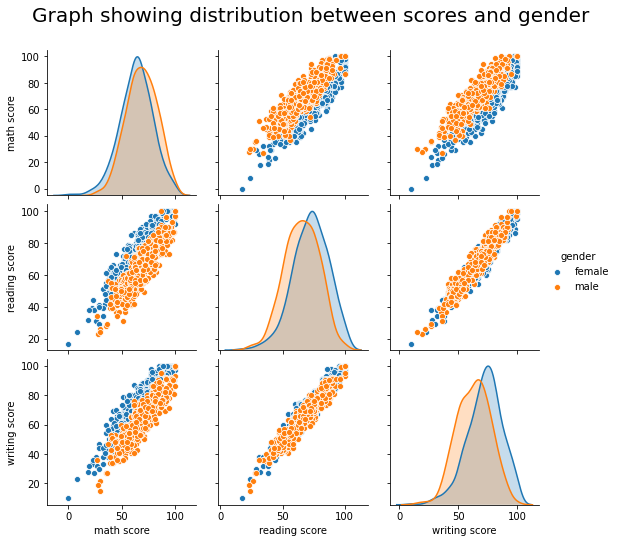

In [0]:
def distribution(dataset,variable):
    '''
    Args:
        dataset: Include DataFrame here
        variable: Include which column (categorical) in the data frame should be used for colour encoding.
    
    Returns:
    Seaborn plot with colour encoding
    '''
    g = sns.pairplot(data = dataset, hue = variable)
    g.fig.suptitle('Graph showing distribution between scores and {}'.format(variable), fontsize = 20)
    g.fig.subplots_adjust(top= 0.9)
    return g

distribution(df, 'gender')

- Why are females better in reading and writing while males are better in math?

### Score and race


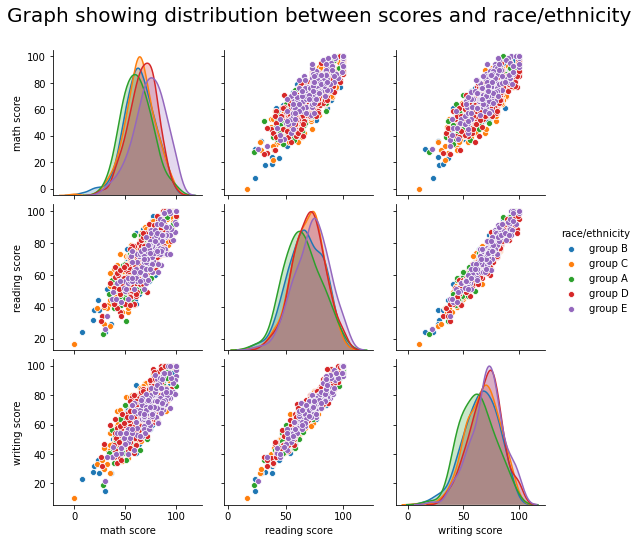

In [0]:
distribution(df, 'race/ethnicity')

- Well, this does not really tell us much since we do not know what races and ethnicities are in each group. 

### Score and parental education level

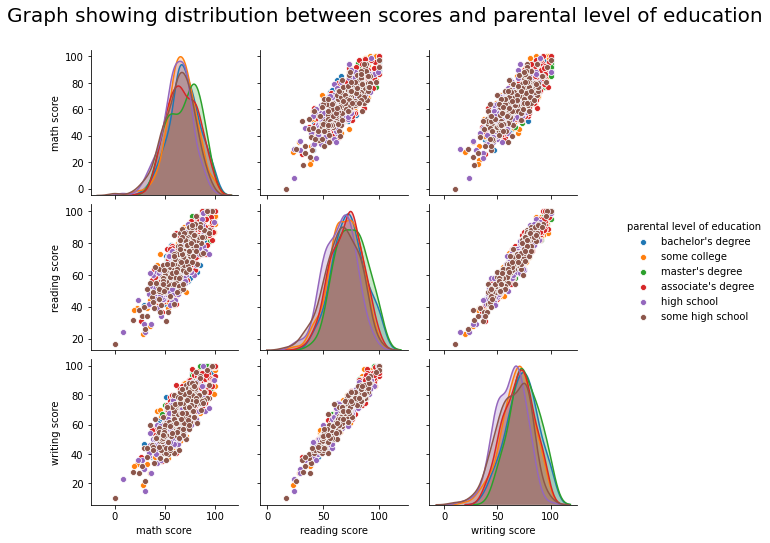

In [0]:
distribution(df, 'parental level of education')

- What does this tell us about the effect of parental education level on student's performance?

### Score and lunch

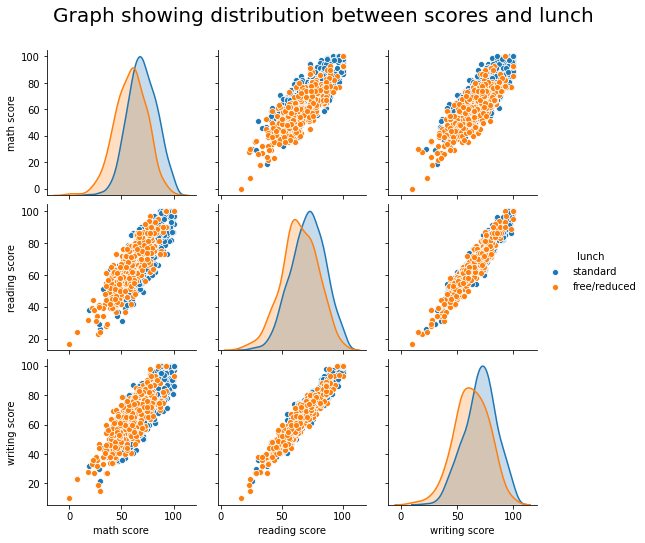

In [0]:
distribution(df, 'lunch')

- Why do students with standard lunch perform better?

### Score vs Test preparation course 

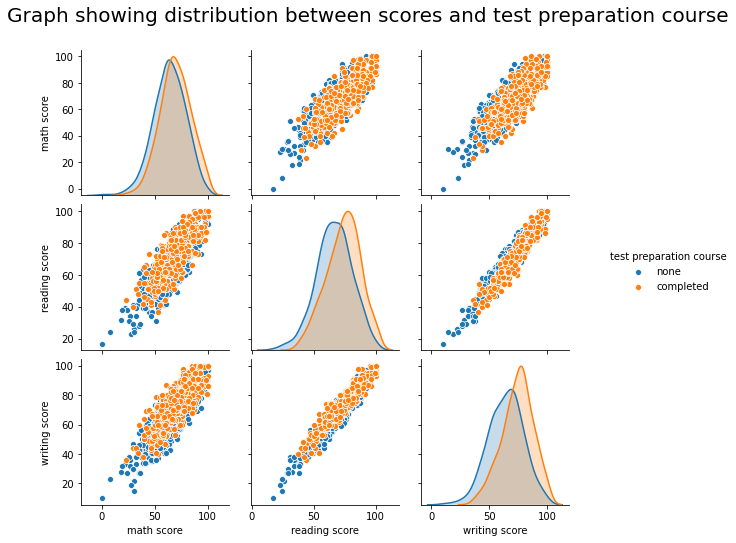

In [0]:
distribution(df, 'test preparation course')

- What does this tell us the effectiveness of test prep courses?

## Finding correlation between variables and test scores 
Given that all variables here is a categorical data, we will need to use 1-way ANOVA test to calculate correlation.

### What is one way ANOVA?
- This technique can be used only for numerical response data, the "Y", usually one variable, and numerical or (usually) categorical input data, the "X", always one variable, hence "one-way".
#### 1-Way ANOVA hypothesis 
- The null hypothesis (H0) is that there is no difference between the groups and equality between means. (Polar bears weigh the same in different months)
- The alternative hypothesis (H1) is that there is a difference between the means and groups. (Polar bears have different weights in different months) 

### 1-Way ANOVA assumptions
- Normality – That each sample is taken from a normally distributed population
- Sample independence – That each sample has been drawn independently of the other samples
- Variance Equality – That the variance of data in the different groups should be the same
- Your dependent variable – Example, “weight”, should be continuous – that is, measured on a scale which can be subdivided using increments (i.e. grams, milligrams)

## Our hypothesis
- We will be using 95% confidence interval (95% chance that the confidence interval you calculated contains the true population mean).
 * The null hypothesis is that they are independent.
 * The alternative hypothesis is that they are correlated in some way.

In [0]:
# Note that I have changed the name for each column here. StatsModels don't accept spaces so I modify each column.
df.columns = ['gender', 'race', 'parental_edu', 'lunch', 'test_prep_course', 'math_score', 'reading_score', 'writing_score']

def anova_test(data, variable):
    '''
    Args: data (DataFrame), variable: Categorical columns that you want to do 1-way ANOVA test with
    
    Returns: Nothing
    '''
    x = ['math_score', 'reading_score', 'writing_score']
    for i,k in enumerate(x):
        lm = ols('{} ~ {}'.format(x[i],variable), data = data).fit()
        table = sm.stats.anova_lm(lm)
        print("P-value for 1-way ANOVA test between {} and {} is ".format(x[i],variable),table.loc[variable,'PR(>F)'])

anova_test(df, 'gender')

P-value for 1-way ANOVA test between math_score and gender is  9.120185549333453e-08
P-value for 1-way ANOVA test between reading_score and gender is  4.680538743934009e-15
P-value for 1-way ANOVA test between writing_score and gender is  2.0198777068682407e-22


- We obtained a P-value < 0.05, what does this tell us about the correlation between score and gender?

### Correlation between race and score

In [0]:
anova_test(df, 'race')

P-value for 1-way ANOVA test between math_score and race is  1.3732194030370688e-11
P-value for 1-way ANOVA test between reading_score and race is  0.0001780089103235852
P-value for 1-way ANOVA test between writing_score and race is  1.0979189070066777e-05


- We obtained a P-value < 0.05, what does this tell us about the correlation between score and race?

### Correlation between parental education and score

In [0]:
anova_test(df, 'parental_edu')

P-value for 1-way ANOVA test between math_score and parental_edu is  5.592272384108375e-06
P-value for 1-way ANOVA test between reading_score and parental_edu is  1.1682457045709003e-08
P-value for 1-way ANOVA test between writing_score and parental_edu is  1.1202799969774331e-13


- We obtained a P-value < 0.05, what does this tell us about the correlation between score and parental education?

### Correlation between lunch and score

In [0]:
anova_test(df, 'lunch')

P-value for 1-way ANOVA test between math_score and lunch is  2.413195599315183e-30
P-value for 1-way ANOVA test between reading_score and lunch is  2.0027966545288553e-13
P-value for 1-way ANOVA test between writing_score and lunch is  3.1861895831680456e-15


- We obtained a P-value < 0.05, what does this tell us about the correlation between score and type of lunch?

### Correlation between test prep course and score

In [0]:
anova_test(df, 'test_prep_course')

P-value for 1-way ANOVA test between math_score and test_prep_course is  1.5359134607155386e-08
P-value for 1-way ANOVA test between reading_score and test_prep_course is  9.081783336895556e-15
P-value for 1-way ANOVA test between writing_score and test_prep_course is  3.6852917352476696e-24


- We obtained a P-value < 0.05, what does this tell us about the correlation between score and test prep course?

## Does the education level of the parents really affect the student's score?

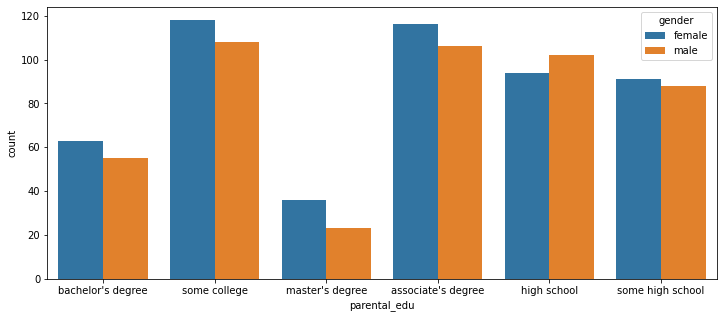

In [0]:
plt.figure(figsize=(12,5))

sns.countplot(data = df, x = 'parental_edu', hue = 'gender')

- We can see that there are only a few students whose parents have a Masters or Bachelor degree. Hence, I don't think we can confidently say that students with highly educated parents will score better. 

## Summary

**P-Values and ANOVA**

If one-way ANOVA reports a P value of <0.05, you reject the null hypothesis that student test scores are all independent of these variables. In our exercise, each variable had a P value of <0.05, meaning that they all influence the student test scores in some way although the extent of influence may be negligible.

*   **Gender:** Females tend to score better in reading and writing while males tend to score better in math.
*   **Lunch type:** Students with standard lunch scored better in all three areas than students on free/reduced lunch.
*   **Test prep course:** Students who completed a test prep course scored better in all three areas.
*   **Race/ethnicity:** There is not enough information to determine if there is correlation between race/ethnicity and math, reading and writing scores. We do not know which races/ethnicitie are in each group despite the P-value being less than 0.05.
*   **Parental education:** There is not enough information to determine if there is correlation between parental education and student test scores when looking at the distribution visually despite the P-value being less than 0.05.

**Sources referenced:**

[Statistics by Jim](https://statisticsbyjim.com/hypothesis-testing/interpreting-p-values/)

[GraphPad](https://www.graphpad.com/support/faqone-way-anova-computes-ap-value-005-significant-effect-of-treatment-but-a-tukey-multiple-comparisons-test-finds-no-statistically-significant-differences-between-any-pairs-of-means-is-this-a-contradiction/)

[Investopedia](https://www.investopedia.com/terms/p/p-value.asp)

[NCBI](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2689604/)

[The Minitab Blog](https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-hypothesis-tests-confidence-intervals-and-confidence-levels)
